<a href="https://colab.research.google.com/github/Anggunnurfitriani/Data-Mining/blob/master/FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tw50=pd.read_csv(r'tw50-period 4.csv')
tw50.columns=['ds','y']
tw50.tail(10)

,ds,y
273,2021/05/17,12559.65
274,2021/05/18,13167.75
275,2021/05/19,13069.04
276,2021/05/20,13032.03
277,2021/05/21,13204.95
278,2021/05/24,13153.04
279,2021/05/25,13415.88
280,2021/05/26,13425.87
281,2021/05/27,13352.46
282,2021/05/28,13536.93


In [ ]:
from sklearn.model_selection import train_test_split
import numpy
x_train = tw50[:int((len(tw50)+1)*.80)] #Remaining 80% to training set
x_train.tail()

,ds,y
222,2021/03/02,13277.75
223,2021/03/03,13528.02
224,2021/03/04,13188.92
225,2021/03/05,13153.20
226,2021/03/08,13102.21


In [ ]:
x_test = tw50[int((len(tw50)+1)*.80):] #Splits 20% data to test set
x_test.head()

,ds,y
227,2021/03/09,13122.59
228,2021/03/10,13164.85
229,2021/03/11,13410.11
230,2021/03/12,13496.22
231,2021/03/15,13462.80


In [ ]:
from fbprophet import Prophet
# define the model
model = Prophet(interval_width = 0.95, yearly_seasonality = True, weekly_seasonality = True)
# fit the model
model.fit(tw50)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from pandas import DataFrame
# define the period for which we want a prediction
future = x_test['ds']
future=DataFrame(future)
future.columns = ['ds']
future

,ds
227,2021/03/09
228,2021/03/10
229,2021/03/11
230,2021/03/12
231,2021/03/15
232,2021/03/16
233,2021/03/17
234,2021/03/18
235,2021/03/19
236,2021/03/22


In [ ]:
future.count()

ds    56
dtype: int64

In [ ]:
x_test.count()

ds    56
y     56
dtype: int64

In [ ]:
forecast_test = model.predict(future)
print(forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2021-03-09  13314.707391  12980.226926  13650.258940
1 2021-03-10  13301.051586  12972.694898  13638.241411
2 2021-03-11  13278.201208  12936.717602  13615.509787
3 2021-03-12  13248.868823  12891.251266  13605.270776
4 2021-03-15  13227.565115  12889.263765  13579.850763


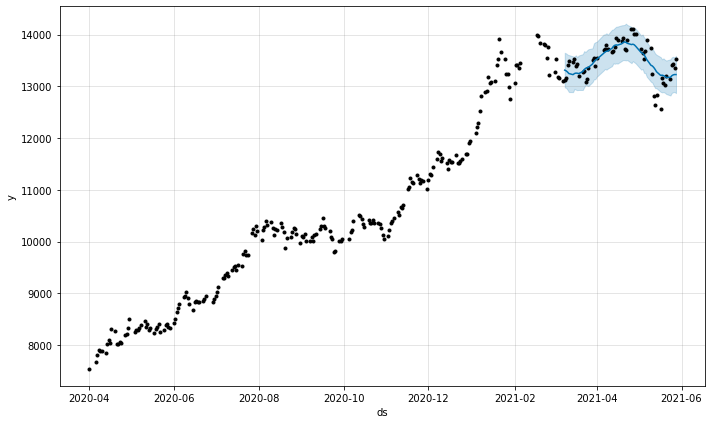

In [ ]:
model.plot(forecast_test)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
forecast_test.to_csv('fore_period 4_tw50.csv')

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE(x_test.y,forecast_test.yhat)

nan

In [ ]:
import pandas as pd
from datetime import datetime

future = pd.date_range('2021-05-31', periods=4).tolist()
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

          ds          yhat    yhat_lower    yhat_upper
0 2021-05-31  13281.068010  12947.654484  13632.664779
1 2021-06-01  13321.221191  12981.207271  13640.291306
2 2021-06-02  13344.267462  13032.188284  13659.089813
3 2021-06-03  13354.276298  13031.521613  13683.118887


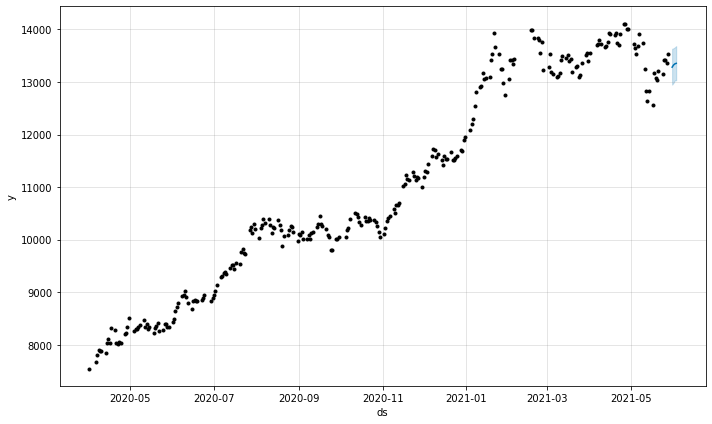

In [ ]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(4))
# plot forecast
model.plot(forecast)
plt.show()

In [ ]:
forecast.to_csv('fore_tw50.csv')